<a href="https://colab.research.google.com/github/KIHOON71/pytorch_tutorial/blob/main/pytorch_dataset_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Datasets and Dastaloaders

- 파이토치는 내장 되어 있는 데이터들이 있다. 
- torch.utils.data.DataLoader 와 torch.utils.data.Dataset에서 미리 내장되어 있는 데이터를 쓸 수 있다.


 ##### Dataset
 - sample과 그에 해당하는 라벨이 들어있음


 ##### Dataloader
 - 반복자로 dataset을 감싸고 있어서 dataset에 쉽게 접근 가능하게 해줌

## Loading a Dataset

- dataset은 다음의 파라미터를 가지고 있다.

1. **root** 는 데이터가 저장 되어 있는 패스이다.
2. **train** 데이터가 테스트로 사용될 건지, 테스트로 사용될 건지이다.
3. **download=True** 는 만약 root가 이용 불가능하면 인터넷에서 데이터를 다운받음
4. **transform** 과 **target_transform**은 feature 와 label을 변환한다.


In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [17]:
training_Data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

# Iterating and Visualizing the Dataset

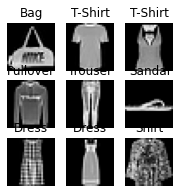

In [18]:
labels_map = {
    0:'T-Shirt',
    1:"Trouser",
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

figure = plt.figure(figsize=(3,3))

cols, rows = 3,3

for i in range(1, cols*rows+1):
  sample_idx = torch.randint(len(training_Data), size=(1,)).item()
  img, label = training_Data[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()


# Creating a Custom Dataset for own files

- 커스텀 데이터 셋은 \_\_init\_\_, \_\_len\_\_, \_\_getitem\_\_ 이 있어야 한다. 

In [19]:
import os
import pandas as pd
from torchvision.io import read_image

In [20]:
class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    return len(self.img_labels)

  def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.ilco[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.ilco[idx, 1]
    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label


### \_\_init\_\_

- \_\_init\_\_ 함수는 Dataset의 오브젝트가 생성될 때 함께 생성된다. 
- 초기화 할 때 이미지를 갖고 있는 디렉토리와, 어노테이션 파일, 그리고 transform들이 초기화 된다.

### \_\_len\_\_

- 데이터 셋의 샘플의 수를 반환

### \_\_getitem\_\_

- 인덱스가 주어졌을 때, 해당하는 인덱스의 이미지와 라벨을 반환하는 함수이다.
  1. 먼저 이미지를 로드
  2. transform 파라미터들이 true일 때 tensor로 변환
  3. 반환


# Preparing your data for training with DataLoaders

 - minibatch의 형태로 데이터를 통과시키고 싶기 때문에, dataloader를 사용한다.
 - epoch마다 다시 섞고 모델의 과적합을 방지하고 싶기 위해 사용한다.

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_Data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


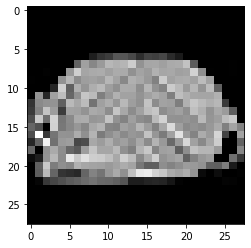

Label : 8


In [21]:
# iterate through the Dataloader

train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape : {train_features.size()}')
print(f'Labels batch shape : {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label : {label}')
